# 常用核函数的计算

$$
K(x, y) = x \cdot y
$$


In [92]:
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])


def linear(X: np.ndarray, Y: np.ndarray):
    """
    线性核函数
    :param X: 
    :param Y: 
    :return: 
    """
    return X @ Y.T


def gaussian(X: np.ndarray, Y: np.ndarray, sigma: float):
    """
    高斯核函数
    :param X: 
    :param Y: 
    :param sigma: 
    :return: 
    """
    return np.exp(-np.linalg.norm(X - Y) ** 2 / (2 * sigma ** 2))


def poly(X: np.ndarray, Y: np.ndarray, gamma: float, c: float, degree: float):
    """
    多项式核函数
    :param X: 
    :param Y: 
    :param gamma: 倍数
    :param c: 偏差
    :param degree: 维度 
    :return: 
    """
    ret = X @ Y.T
    return (ret * gamma + c) ** degree


linear(x, y), gaussian(x, y, 4), poly(x, x, 1, 0, 1)

(70, 0.1353352832366127, 30)

# svm 算法

## svm 分类算法

In [93]:
from sklearn.svm import SVC, NuSVC, LinearSVC

X = np.array([[4, 3], [3, 3], [1, 1]])
y = np.array([1, 1, -1])

# C: 惩罚系数
# kernel: 核函数, 默认高斯
model = SVC(kernel='linear')
model.fit(X, y)

model.predict(np.array([[4, 5], [0, 0], [1, 3]]))

array([ 1, -1,  1])

In [94]:
model.coef_, model.support_vectors_, model.support_, model.decision_function(X), model.intercept_

(array([[0.5, 0.5]]),
 array([[1., 1.],
        [3., 3.]]),
 array([2, 1], dtype=int32),
 array([ 1.5,  1. , -1. ]),
 array([-2.]))

### 非线性SVM


([], [])

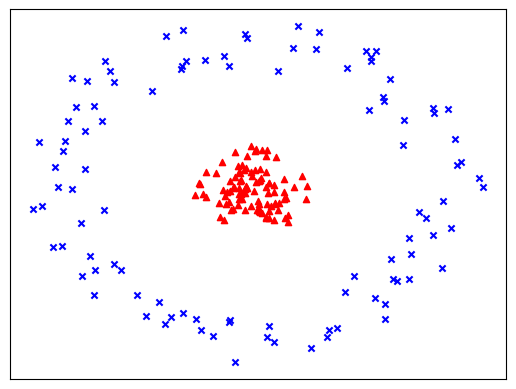

In [95]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# 中文支持
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']


def plot_decision_boundary(plt: plt.Axes, model: SVC, X: np.ndarray, y: np.ndarray, h=0.03, draw_SV=True,
                           title='精度范围'):
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 坐标矩阵
    xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))  # type: np.ndarray, np.ndarray

    label_predict = model.predict(np.stack((xx.flat, yy.flat), axis=1))  # type: np.ndarray

    label_predict = label_predict.reshape(xx.shape)

    # plt.set_title(title)
    # plt.xlim(xx.min(), xx.max())
    # plt.ylim(yy.min(), yy.max())
    # plt.xticks()
    # plt.yticks()

    plt.contourf(xx, yy, label_predict, alpha=0.5)

    markers = ['x', '^', 'o']
    colors = ['b', 'r', 'c']

    classes = np.unique(y)

    for label in classes:
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], c=colors[label], s=60, marker=markers[label])

    if draw_SV:
        SV = model.support_vectors_
        n = model.n_support_[0]
        plt.scatter(SV[:n, 0], SV[:n, 1], s=15, c='black', marker='o')
        plt.scatter(SV[n:, 0], SV[n:, 1], s=15, c='g', marker='o')


# 产生样本点
X, y = make_circles(200, factor=0.1, noise=0.1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', s=20, marker='x')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', s=20, marker='^')
plt.xticks(())
plt.yticks(())

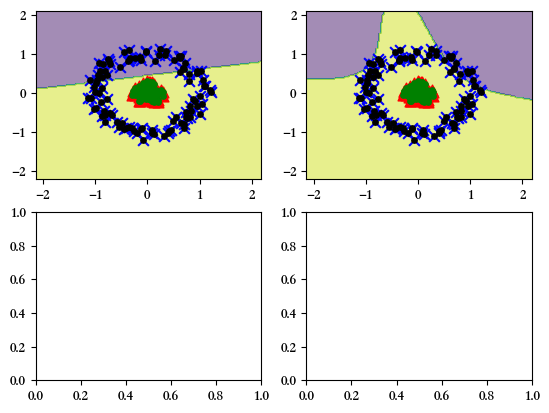

In [96]:
model_liner = SVC(C=1.0, kernel='linear')
model_liner.fit(X, y)
fig, axes = plt.subplots(2, 2)  # type: plt.Figure, list[list[plt.Axes]]

plot_decision_boundary(axes[0][0], model_liner, X, y, title='线性核函数')

model_poly = SVC(C=1.0, kernel='poly', degree=3, gamma='auto')
model_poly.fit(X, y)
plot_decision_boundary(axes[0][1], model_poly, X, y, title='多项式核函数')


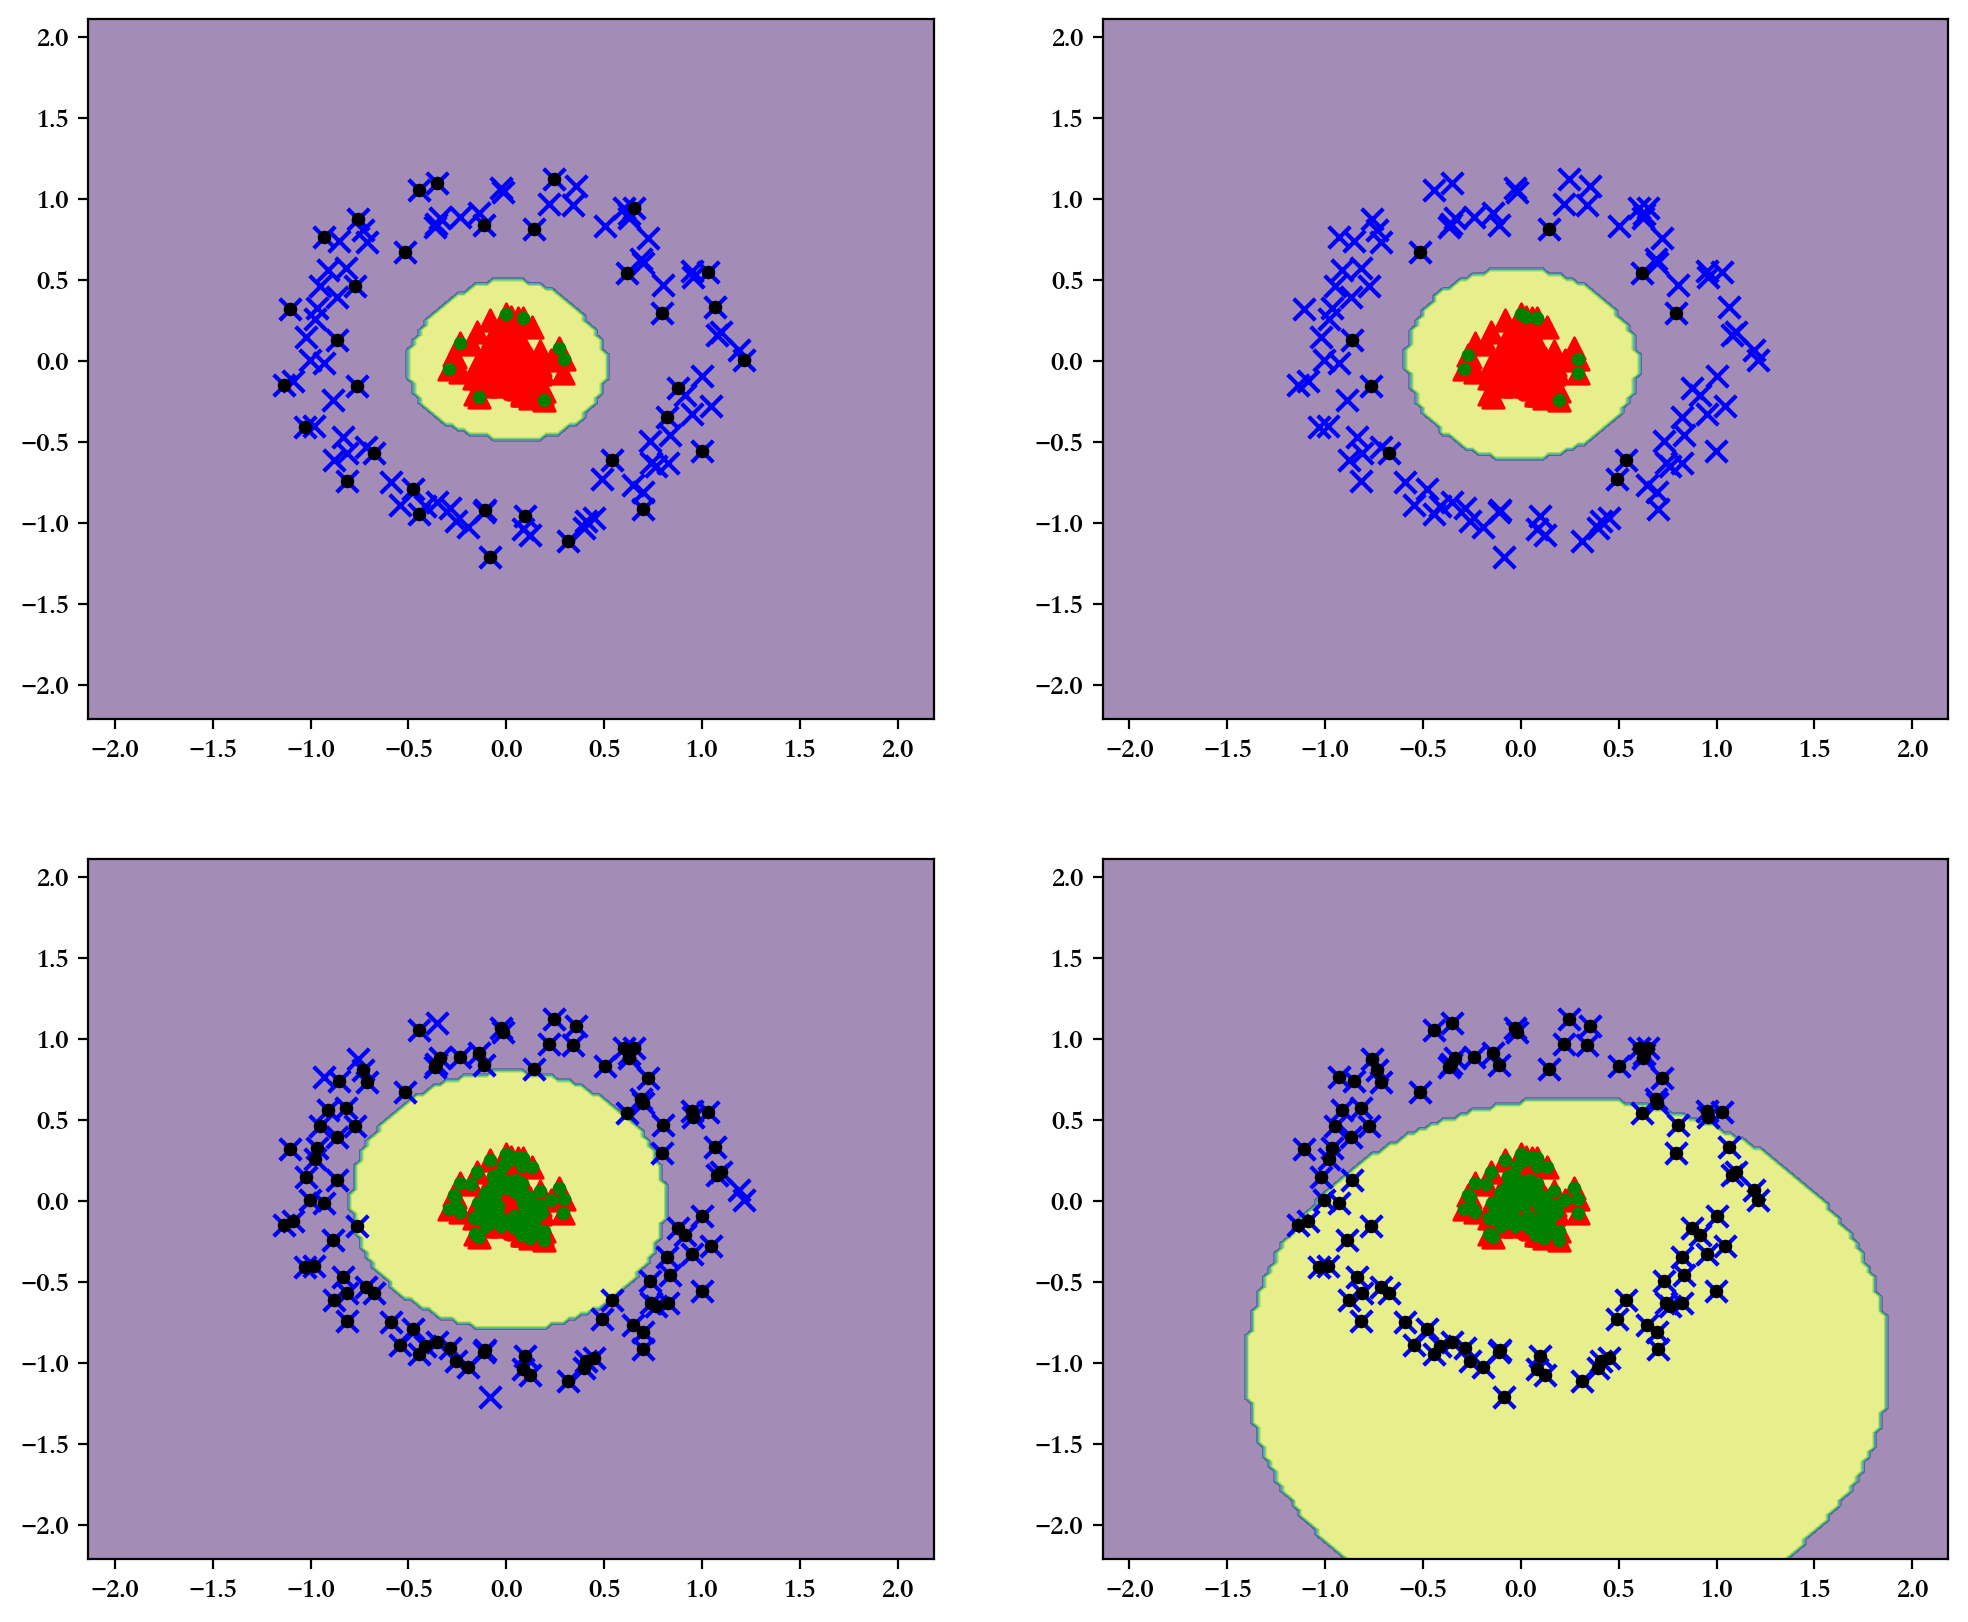

In [97]:
plt.figure(figsize=(12, 10), dpi=200)
for j, gamma in enumerate((10, 1, 0.1, 0.01)):
    plt.subplot(2, 2, j + 1)
    model_rtf = SVC(C=1.0, kernel='rbf', gamma=gamma)
    model_rtf.fit(X, y)
    plot_decision_boundary(plt, model_rtf, X, y, title=f'rbf函数 gamma={gamma}')

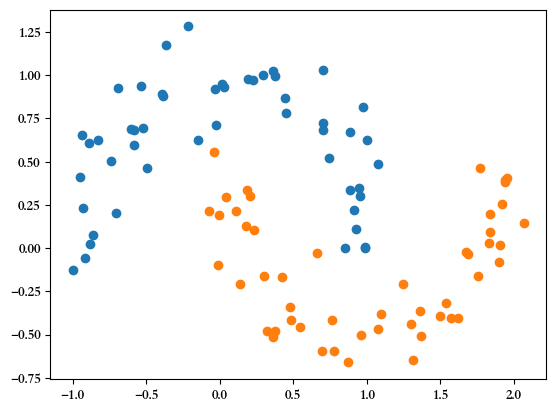

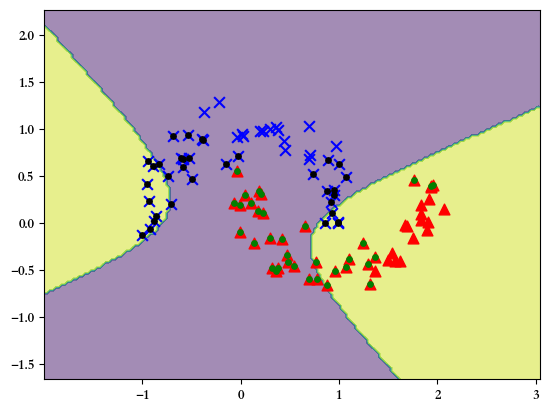

In [131]:


X = np.array([[1.58330836e-02, 9.48635918e-01],
              [8.74391770e-01, -6.60960740e-01],
              [1.90567955e+00, 1.57762215e-02],
              [1.76712793e+00, 4.61455453e-01],
              [9.85679782e-01, 6.48245492e-03],
              [1.53638288e+00, -3.18853962e-01],
              [1.77101389e-01, 1.26671939e-01],
              [1.93973267e+00, 3.95413210e-01],
              [-7.41190696e-01, 5.04204930e-01],
              [-2.16481439e-01, 1.28238704e+00],
              [3.75739596e-01, 9.94373013e-01],
              [1.07411865e+00, 4.85736353e-01],
              [1.37129502e+00, -5.06159442e-01],
              [-9.14971791e-01, -5.82601780e-02],
              [3.19359419e-01, -4.80897640e-01],
              [1.83135104e+00, 2.70266838e-02],
              [1.24373032e+00, -2.10047852e-01],
              [-6.06026488e-01, 6.88377707e-01],
              [1.07678022e+00, -4.66803184e-01],
              [-8.91805257e-01, 6.09956046e-01],
              [2.04243824e-01, 3.04228120e-01],
              [1.75240795e+00, -1.58738944e-01],
              [-3.85393350e-01, 8.77958401e-01],
              [9.15245071e-01, 2.22858467e-01],
              [9.75013363e-01, 8.18879842e-01],
              [8.83305469e-01, 3.35484610e-01],
              [4.24706584e-01, -1.65651926e-01],
              [-2.22010019e-02, 7.14482877e-01],
              [1.86957399e-01, 3.39245979e-01],
              [1.83601543e+00, 9.26196050e-02],
              [7.04168173e-01, 7.25168221e-01],
              [1.00105472e+00, 6.25661446e-01],
              [9.26444663e-01, 1.08743362e-01],
              [4.46438442e-01, 8.69697689e-01],
              [-3.34839467e-02, 9.18273278e-01],
              [7.62356087e-01, -4.14950818e-01],
              [4.75113729e-01, -3.38078903e-01],
              [1.93873891e+00, 3.80867367e-01],
              [1.95444528e-01, 9.76167450e-01],
              [-9.37029868e-01, 6.54370347e-01],
              [-9.30878958e-01, 2.34874267e-01],
              [1.31546966e+00, -6.47085899e-01],
              [9.86044212e-01, 2.88249026e-03],
              [1.09888500e+00, -3.82041309e-01],
              [6.58453680e-01, -2.97751189e-02],
              [7.39393783e-01, 5.21013642e-01],
              [2.87742960e-02, 9.30204071e-01],
              [3.59117699e-01, 1.02611245e+00],
              [-5.82095126e-01, 5.95984238e-01],
              [1.83635173e+00, 1.96811531e-01],
              [-6.88963811e-01, 9.25944856e-01],
              [-6.06343327e-03, 1.89302203e-01],
              [-3.68510049e-01, 1.17556925e+00],
              [1.62003712e+00, -4.01144854e-01],
              [1.10755739e-01, 2.12620975e-01],
              [1.91981676e+00, 2.53001737e-01],
              [1.29859493e+00, -4.38667675e-01],
              [-8.80202162e-01, 2.14779115e-02],
              [-5.36277169e-01, 9.39523059e-01],
              [1.36419812e+00, -3.63732731e-01],
              [-8.63474886e-01, 7.79548144e-02],
              [-4.94238955e-01, 4.65815260e-01],
              [4.47781579e-01, 7.79725875e-01],
              [9.50195249e-01, 3.01439801e-01],
              [2.98346599e-01, -1.59947879e-01],
              [-3.81994857e-02, 5.58073964e-01],
              [8.54476468e-01, 5.85590388e-04],
              [6.99624831e-01, 1.02853582e+00],
              [2.30378128e-01, 1.05754732e-01],
              [4.84101959e-01, -4.18095437e-01],
              [6.93636915e-01, -5.93623841e-01],
              [4.42524079e-02, 2.96975530e-01],
              [7.79090492e-01, -5.97494690e-01],
              [2.06773978e+00, 1.47174832e-01],
              [1.35301219e-01, -2.07487167e-01],
              [-7.13859277e-02, 2.16467326e-01],
              [9.58754937e-01, -5.04884890e-01],
              [1.95543286e+00, 4.07950036e-01],
              [-3.94148404e-01, 8.89385737e-01],
              [1.49500161e+00, -3.93237571e-01],
              [9.49180638e-01, 3.50838949e-01],
              [5.44173701e-01, -4.56955034e-01],
              [1.57203156e+00, -4.04863883e-01],
              [3.61990165e-01, -5.11524478e-01],
              [-5.81115442e-01, 6.84694859e-01],
              [6.99522611e-01, 6.84020151e-01],
              [8.86835467e-01, 6.73392303e-01],
              [2.28472311e-01, 9.75499364e-01],
              [1.67607100e+00, -1.96999433e-02],
              [2.95318884e-01, 1.00221531e+00],
              [-7.08366715e-01, 2.04838856e-01],
              [1.68934251e+00, -3.55042304e-02],
              [-8.24706019e-01, 6.24611711e-01],
              [-1.47439006e-01, 6.25775753e-01],
              [3.79056683e-01, -4.81558031e-01],
              [-9.97277789e-01, -1.26119674e-01],
              [1.89912347e+00, -7.87429337e-02],
              [-5.22182681e-01, 6.92293901e-01],
              [-1.02976326e-02, -9.69610587e-02],
              [-9.51553169e-01, 4.11766224e-01]])
y = np.array(
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
     1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

model_poly_2 = SVC(C=1.2, kernel='poly', degree=2, gamma=0.5)
model_poly_2.fit(X, y)
plot_decision_boundary(plt, model_poly_2, X, y)


## svm 回归算法